In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import cmath

Fourier Analysis of Signals Using DFT 

Let  be the discrete-time signal obtained by sampling with sampling frequency . 
Write down expressions for :
Let us assume that we have values available for only using which we are required to do frequency analysis. We assume that  for .  That is, we have the windowed sequence, , defined as follows:, where for  and , otherwise. This window is called as the rectangular window. 

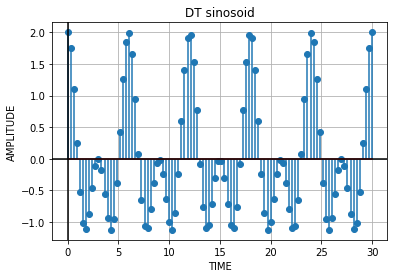

In [2]:
#QUESTION - 1
# code to get x[n] and w[n]

#angular frequency
w0 = 2*np.pi/6
w1 = 2*np.pi/3

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

fs = 100 #sampling frequency

#discrete time axis
n = np.linspace(0,30,fs)

x_n = A1*np.cos(w0*n) + A2*np.cos(w1*n)

#plotting
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

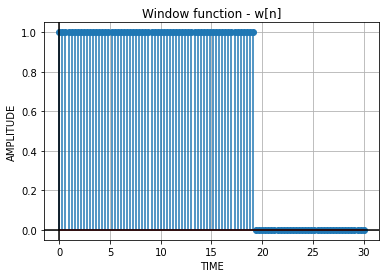

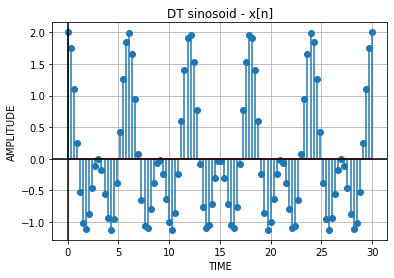

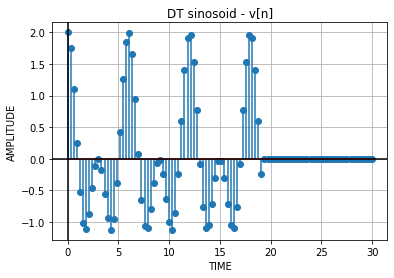

In [3]:
#Define a rectangular window of length L, w[n]

L = 64
w_n = np.ones(L)

#window function
w_n = np.append(w_n, np.zeros(x_n.shape[0] - L))

#time limited sequence will be
v_n = x_n*w_n

#plotting w_n
plt.grid()
plt.stem(n, w_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('Window function - w[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting x_n
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - x[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting
plt.grid()
plt.stem(n, v_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - v[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [4]:
#Compute N-point DFT, V[K] of v[n] and plot V[K]

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    x = np.array(x)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1)) #taking transpose
    e = np.exp(-2j * np.pi * k * n / N)
    
    X_k = np.dot(e, x)
    
    magnitude_spec = []

    for i in range(N):
        magnitude_spec.append(np.linalg.norm(X_k[i]))
    
    phase_spec = []

    for i in range(N):
        phase_spec.append(cmath.phase(X_k[i]))
    
    return X_k, magnitude_spec, phase_spec

def IDFT(x):
    """
    Function to calculate the 
    inverse discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    x = np.array(x)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1)) #taking transpose
    e = np.exp(2j * np.pi * k * n / N)
    
    X_n = (1/N)*np.dot(e, x)
    
    return X_n

In [5]:
v_k, mag, phase = DFT(v_n)

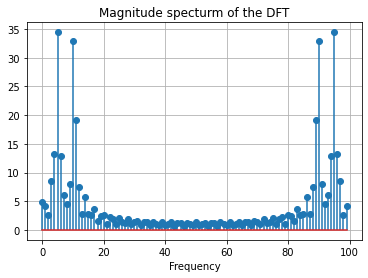

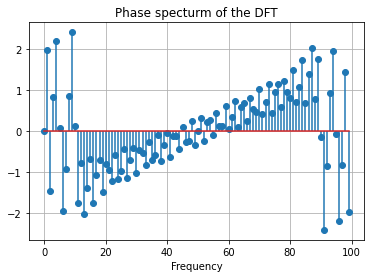

In [6]:
plt.stem(mag)
plt.grid()
plt.title('Magnitude specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

plt.stem(phase)
plt.grid()
plt.title('Phase specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

In [7]:
#DTFT and IDTFT

def DTFT(x):
    x = np.array(x)
    w = np.linspace(0, 2*np.pi, 500)
    x_ejw = []

    for i in range(len(w)):
        x_ejw.append(np.sum(x*np.exp(-1j * w[i]* np.arange(len(x)))))

    magnitude_spec = []

    for i in range(len(w)):
        magnitude_spec.append(np.linalg.norm(x_ejw[i]))
    
    plt.title('Magnitude specturm of the DTFT')
    plt.plot(w, magnitude_spec)
    plt.grid()
    plt.xlabel('Frequency')
    plt.show()
    
    phase_spec = []

    for i in range(len(w)):
        phase_spec.append(cmath.phase(x_ejw[i]))
  
    plt.title('Phase specturm of the DTFT')
    plt.grid()
    plt.plot(w, phase_spec)
    plt.xlabel('Frequency')
    plt.show()
    
    return x_ejw, magnitude_spec, phase_spec

def IDTFT(x, n_samples):
    x = np.array(x)
    w = np.linspace(0, 2*np.pi, 500)
    n= np.linspace(0, n_samples, 1)
    x_n = []

    for i in range(n_samples):
        x_n.append(np.sum(x*np.exp(1j*w*i)))

    x_n = np.array(x_n)
    x_n = np.real((x_n/100))
    
    return x_n

DTFT of the window function w[n] from -pi to pi


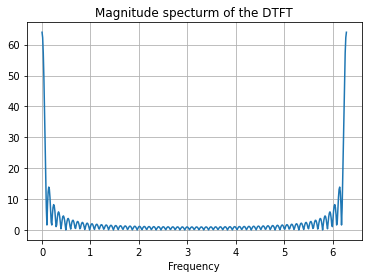

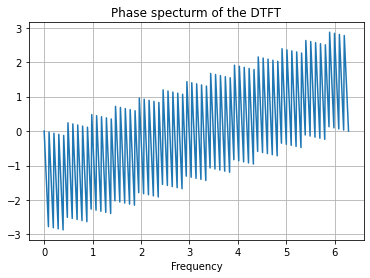

In [8]:
print('DTFT of the window function w[n] from -pi to pi')
cmplx, mag_w, phase_w = DTFT(w_n)

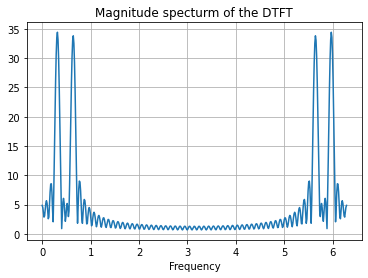

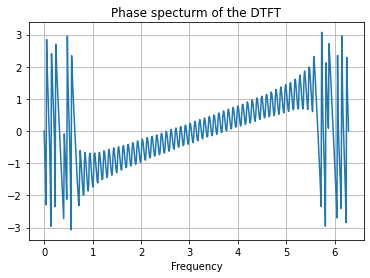

In [9]:
cmplx, mag_v, phase_v = DTFT(v_n)

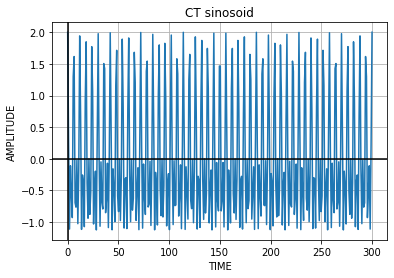

In [10]:
#construct and plot a CT sinosouid

#intializing the time axis
step = 330 #Resolution of time variable/sampling time
t = np.linspace(0,300, step)

#parameters of the sinosoid function
w0 = 2*np.pi/6
w1 = 2*np.pi/3

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

x_t = A1*np.cos(w0*t) + A2*np.cos(w1*t) #ct signal

#plotting the sinosoid wrt time
plt.grid()
plt.plot(t, x_t)
plt.title('CT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.show()

Plot of X(w), for sampling rate Ts = 330


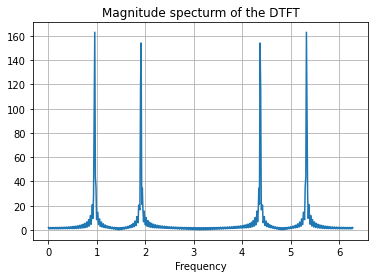

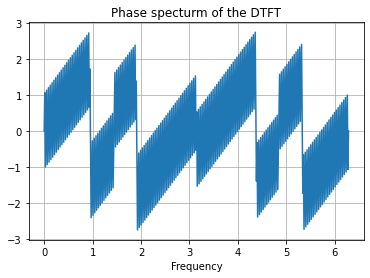

In [11]:
print('Plot of X(w), for sampling rate Ts = 330')

values_continous, mag_cont_sampled, phase_cont_sampled = DTFT(x_t)

Estimate of CTFT of x(t) is: 


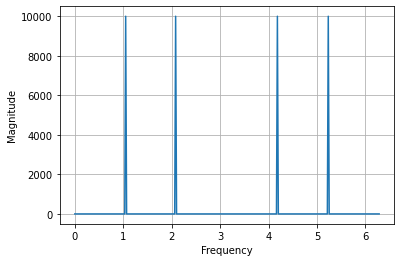

In [12]:
print('Estimate of CTFT of x(t) is: ')

x = np.linspace(0, 2*np.pi, 330)
x[274]
x[219]
x[109]
x[55]
y = np.zeros(330)

#impulses as frequencies at wc set to 10000 values
y[274] = y[219] = y[109] = y[55] = 10000

plt.plot(x, y)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

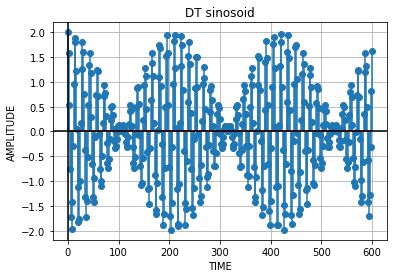

In [13]:
#QUESTION - 2
# code to get x[n] and w[n]

#angular frequency
w0 = 2*np.pi/14
w1 = 2*np.pi/15

#amplitude of signals
A1 = A2 = 1

fs = 400 #sampling frequency

#discrete time axis
n = np.linspace(0,600,fs)

x_n = A1*np.cos(w0*n) + A2*np.cos(w1*n)

#plotting
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

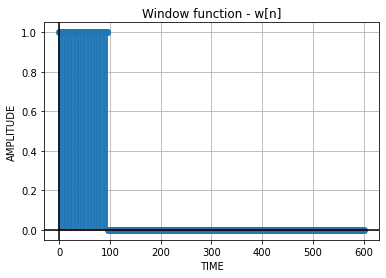

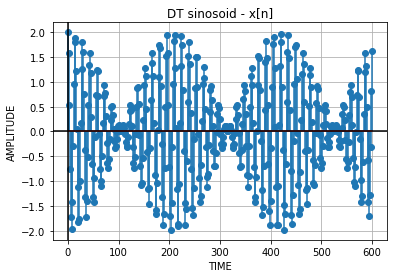

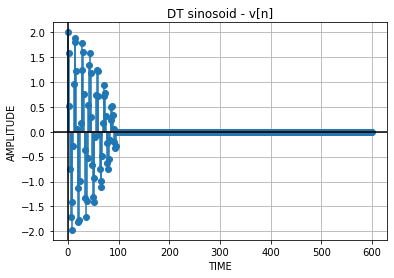

In [14]:
#Define a rectangular window of length L, w[n]

L = 64
w_n = np.ones(L)

#window function
w_n = np.append(w_n, np.zeros(x_n.shape[0] - L))

#time limited sequence will be
v_n = x_n*w_n

#plotting w_n
plt.grid()
plt.stem(n, w_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('Window function - w[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting x_n
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - x[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting
plt.grid()
plt.stem(n, v_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - v[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [15]:
v_k, mag, phase = DFT(v_n)

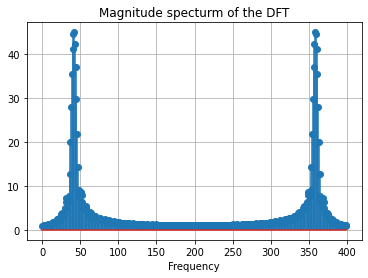

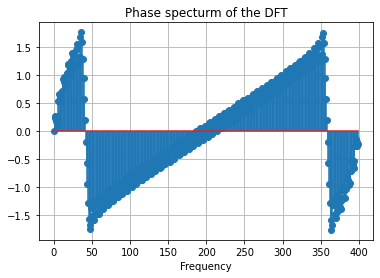

In [16]:
plt.stem(mag)
plt.grid()
plt.title('Magnitude specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

plt.stem(phase)
plt.grid()
plt.title('Phase specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

DTFT of the window function w[n] from -pi to pi


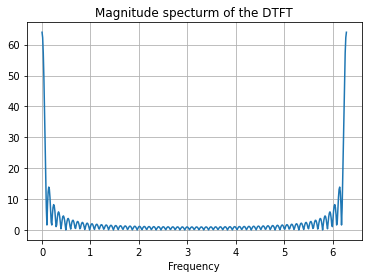

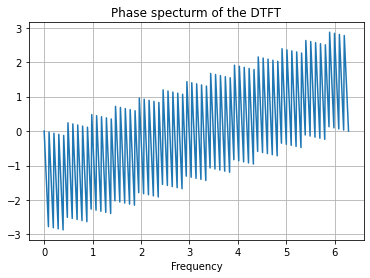

In [17]:
print('DTFT of the window function w[n] from -pi to pi')
cmplx, mag_w, phase_w = DTFT(w_n)

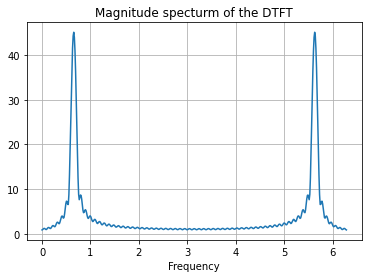

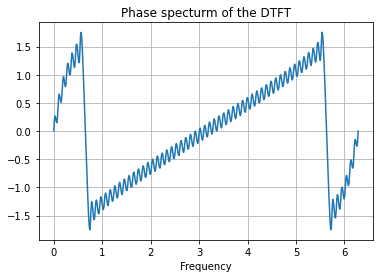

In [18]:
cmplx, mag_v, phase_v = DTFT(v_n)

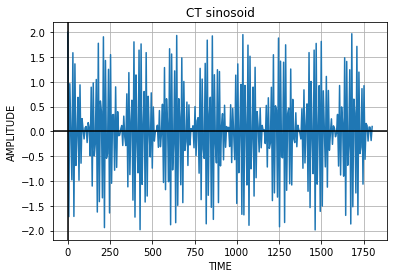

In [19]:
#construct and plot a CT sinosouid

#intializing the time axis
step = 300 #Resolution of time variable/sampling time
t = np.linspace(0,1800, step)

#parameters of the sinosoid function
w0 = 2*np.pi/14
w1 = 2*np.pi/15

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

x_t = A1*np.cos(w0*t) + A2*np.cos(w1*t) #ct signal

#plotting the sinosoid wrt time
plt.grid()
plt.plot(t, x_t)
plt.title('CT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.show()

Plot of X(w), for sampling rate Ts = 330


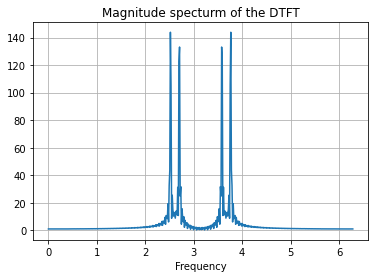

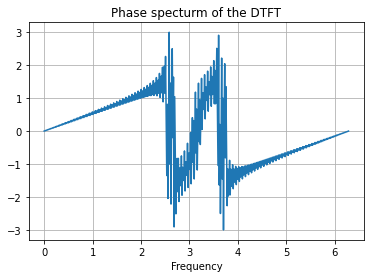

In [20]:
print('Plot of X(w), for sampling rate Ts = 330')

values_continous, mag_cont_sampled, phase_cont_sampled = DTFT(x_t)

Estimate of CTFT of x(t) is: 


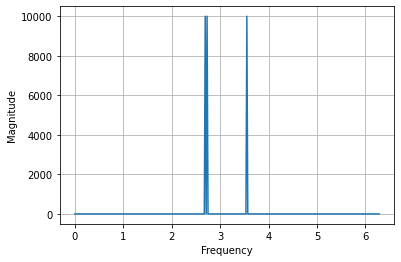

In [21]:
print('Estimate of CTFT of x(t) is: ')

x = np.linspace(0, 2*np.pi, 330)
x[186]
x[188]
x[141]
x[143]

y = np.zeros(330)
#impulses as frequencies at wc set to 10000 values
y[186] = y[186] = y[141] = y[143] = 10000

plt.plot(x, y)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

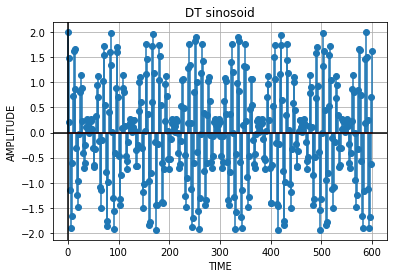

In [22]:
#QUESTION - 3
# code to get x[n] and w[n]

#angular frequency
w0 = 2*np.pi/14
w1 = 2*np.pi/12

#amplitude of signals
A1 = A2 = 1

fs = 400 #sampling frequency

#discrete time axis
n = np.linspace(0,600,fs)

x_n = A1*np.cos(w0*n) + A2*np.cos(w1*n)

#plotting
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

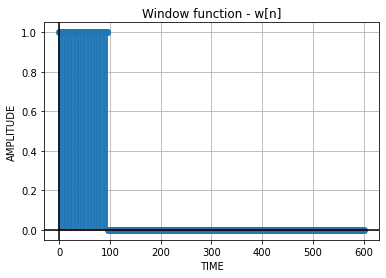

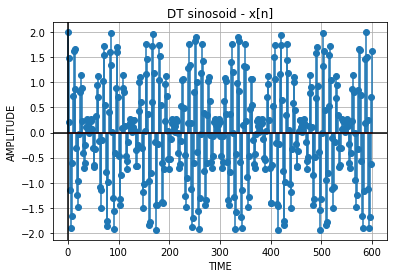

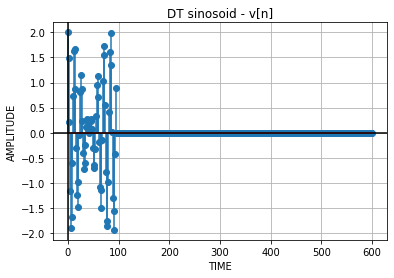

In [23]:
#Define a rectangular window of length L, w[n]

L = 64
w_n = np.ones(L)

#window function
w_n = np.append(w_n, np.zeros(x_n.shape[0] - L))

#time limited sequence will be
v_n = x_n*w_n

#plotting w_n
plt.grid()
plt.stem(n, w_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('Window function - w[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting x_n
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - x[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting
plt.grid()
plt.stem(n, v_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - v[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [24]:
v_k, mag, phase = DFT(v_n)

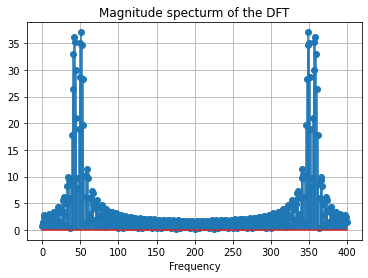

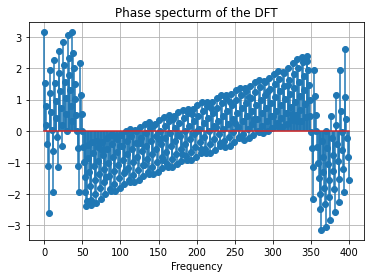

In [25]:
plt.stem(mag)
plt.grid()
plt.title('Magnitude specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

plt.stem(phase)
plt.grid()
plt.title('Phase specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

DTFT of the window function w[n] from -pi to pi


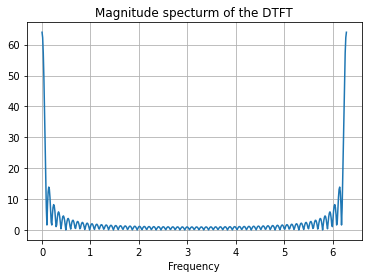

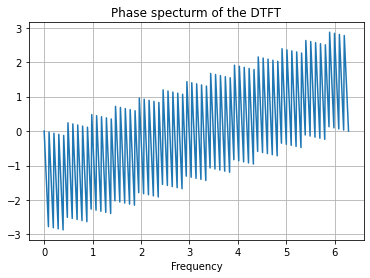

In [26]:
print('DTFT of the window function w[n] from -pi to pi')
cmplx, mag_w, phase_w = DTFT(w_n)

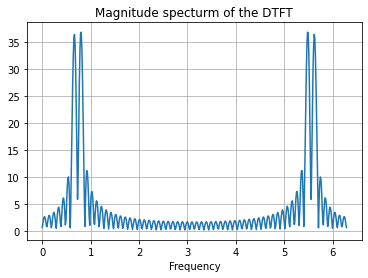

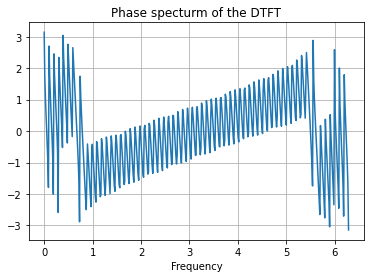

In [27]:
cmplx, mag_v, phase_v = DTFT(v_n)

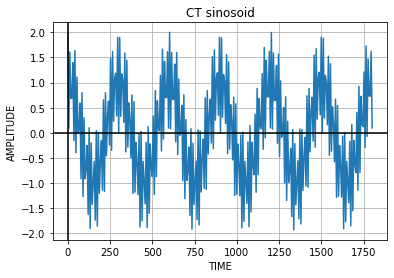

In [28]:
#construct and plot a CT sinosouid

#intializing the time axis
step = 300 #Resolution of time variable/sampling time
t = np.linspace(0,1800, step)

#parameters of the sinosoid function
w0 = 2*np.pi/14
w1 = 2*np.pi/1

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

x_t = A1*np.cos(w0*t) + A2*np.cos(w1*t) #ct signal

#plotting the sinosoid wrt time
plt.grid()
plt.plot(t, x_t)
plt.title('CT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.show()

Plot of X(w), for sampling rate Ts = 330


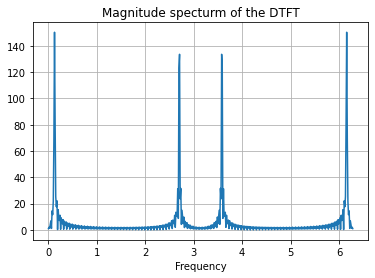

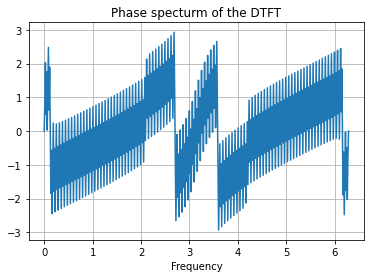

In [29]:
print('Plot of X(w), for sampling rate Ts = 330')

values_continous, mag_cont_sampled, phase_cont_sampled = DTFT(x_t)

Estimate of CTFT of x(t) is: 


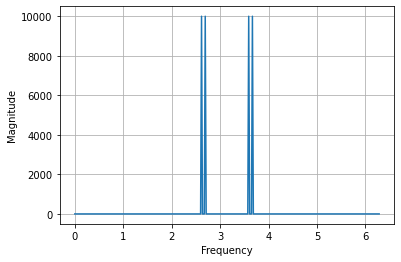

In [30]:
print('Estimate of CTFT of x(t) is: ')

x = np.linspace(0, 2*np.pi, 330)
x[188]
x[192]
x[141]
x[137]


y = np.zeros(330)
#impulses as frequencies at wc set to 10000 values
y[188] = y[192] = y[141] = y[137] = 10000

plt.plot(x, y)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()


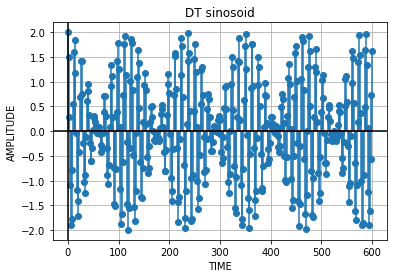

In [31]:
#QUESTION - 4
# code to get x[n] and w[n]

#angular frequency
w0 = 2*np.pi/14
w1 = 4*np.pi/25

#amplitude of signals
A1 = A2 = 1

fs = 400 #sampling frequency

#discrete time axis
n = np.linspace(0,600,fs)

x_n = A1*np.cos(w0*n) + A2*np.cos(w1*n)

#plotting
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

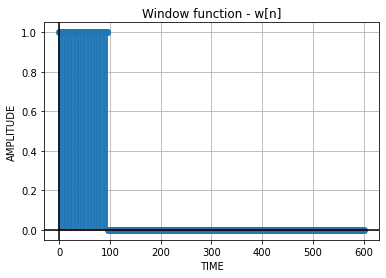

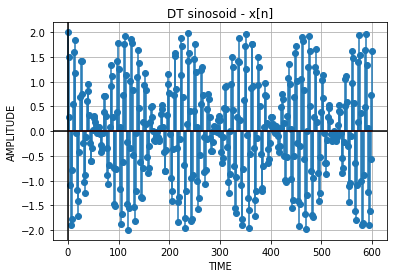

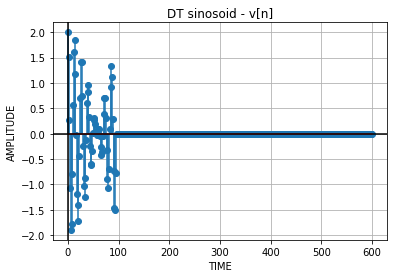

In [32]:
#Define a rectangular window of length L, w[n]

L = 64
w_n = np.ones(L)

#window function
w_n = np.append(w_n, np.zeros(x_n.shape[0] - L))

#time limited sequence will be
v_n = x_n*w_n

#plotting w_n
plt.grid()
plt.stem(n, w_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('Window function - w[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting x_n
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - x[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting
plt.grid()
plt.stem(n, v_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - v[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [33]:
v_k, mag, phase = DFT(v_n)

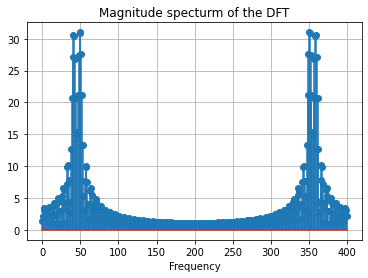

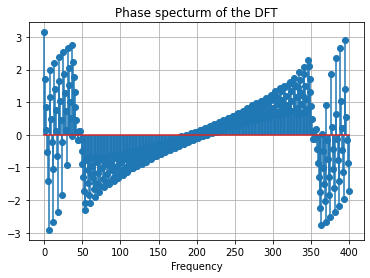

In [34]:
plt.stem(mag)
plt.grid()
plt.title('Magnitude specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

plt.stem(phase)
plt.grid()
plt.title('Phase specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

DTFT of the window function w[n] from -pi to pi


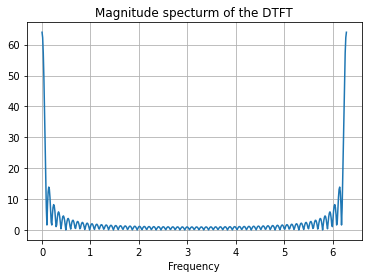

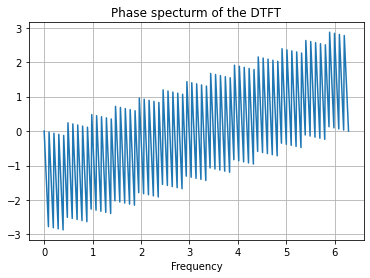

In [35]:
print('DTFT of the window function w[n] from -pi to pi')
cmplx, mag_w, phase_w = DTFT(w_n)

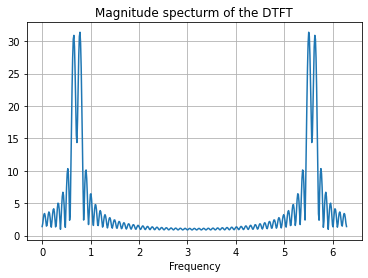

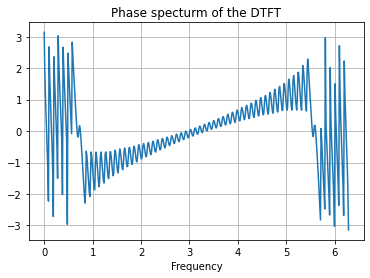

In [36]:
cmplx, mag_v, phase_v = DTFT(v_n)

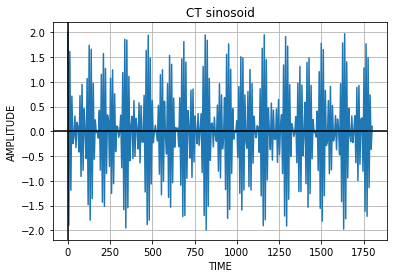

In [37]:
#construct and plot a CT sinosouid

#intializing the time axis
step = 300 #Resolution of time variable/sampling time
t = np.linspace(0,1800, step)

#parameters of the sinosoid function
w0 = 2*np.pi/14
w1 = 4*np.pi/25

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

x_t = A1*np.cos(w0*t) + A2*np.cos(w1*t) #ct signal

#plotting the sinosoid wrt time
plt.grid()
plt.plot(t, x_t)
plt.title('CT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.show()

Plot of X(w), for sampling rate Ts = 330


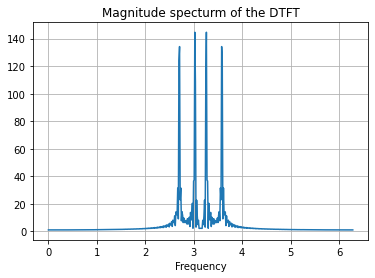

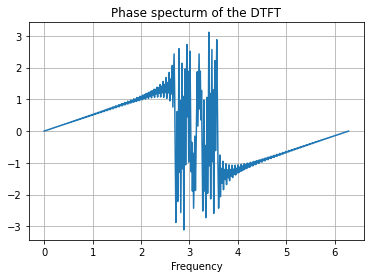

In [38]:
print('Plot of X(w), for sampling rate Ts = 330')

values_continous, mag_cont_sampled, phase_cont_sampled = DTFT(x_t)

Estimate of CTFT of x(t) is: 


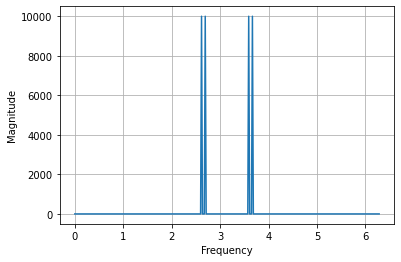

In [39]:
print('Estimate of CTFT of x(t) is: ')

x = np.linspace(0, 2*np.pi, 330)
x[188]
x[192]
x[141]
x[137]


y = np.zeros(330)
#impulses as frequencies at wc set to 10000 values
y[188] = y[192] = y[141] = y[137] = 10000

plt.plot(x, y)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()


INFERENCES: CHANGING THE VALUE OF L

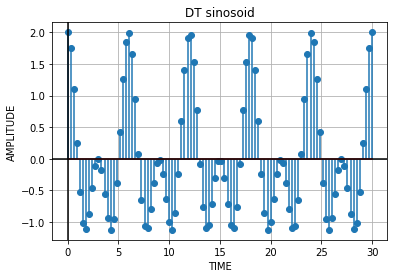

In [40]:
#QUESTION - 1 Changing L
# code to get x[n] and w[n]

#angular frequency
w0 = 2*np.pi/6
w1 = 2*np.pi/3

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

fs = 100 #sampling frequency

#discrete time axis
n = np.linspace(0,30,fs)

x_n = A1*np.cos(w0*n) + A2*np.cos(w1*n)

#plotting
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

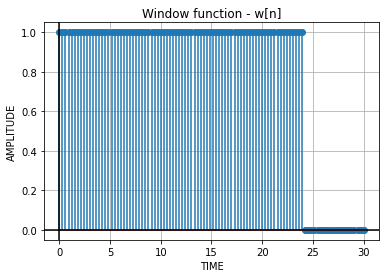

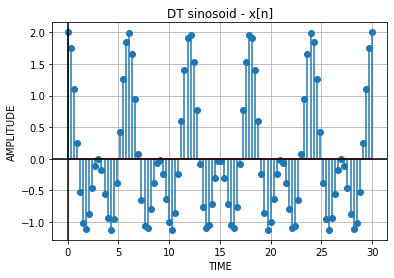

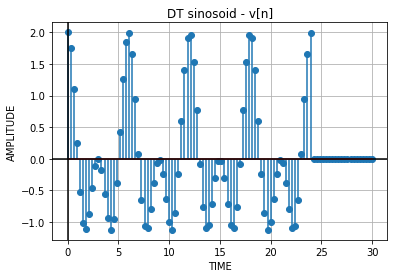

In [41]:
#Define a rectangular window of length L, w[n]

L = 80
w_n = np.ones(L)

#window function
w_n = np.append(w_n, np.zeros(x_n.shape[0] - L))

#time limited sequence will be
v_n = x_n*w_n

#plotting w_n
plt.grid()
plt.stem(n, w_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('Window function - w[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting x_n
plt.grid()
plt.stem(n, x_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - x[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

#plotting
plt.grid()
plt.stem(n, v_n)
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.title('DT sinosoid - v[n]')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

In [42]:
#Compute N-point DFT, V[K] of v[n] and plot V[K]

def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    x = np.array(x)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1)) #taking transpose
    e = np.exp(-2j * np.pi * k * n / N)
    
    X_k = np.dot(e, x)
    
    magnitude_spec = []

    for i in range(N):
        magnitude_spec.append(np.linalg.norm(X_k[i]))
    
    phase_spec = []

    for i in range(N):
        phase_spec.append(cmath.phase(X_k[i]))
    
    return X_k, magnitude_spec, phase_spec

def IDFT(x):
    """
    Function to calculate the 
    inverse discrete Fourier Transform 
    of a 1D real-valued signal x
    """
    x = np.array(x)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1)) #taking transpose
    e = np.exp(2j * np.pi * k * n / N)
    
    X_n = (1/N)*np.dot(e, x)
    
    return X_n

In [43]:
v_k, mag, phase = DFT(v_n)

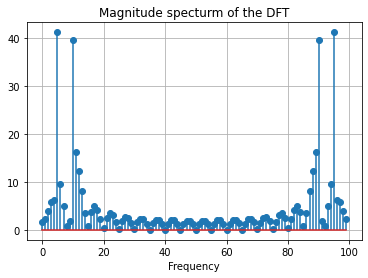

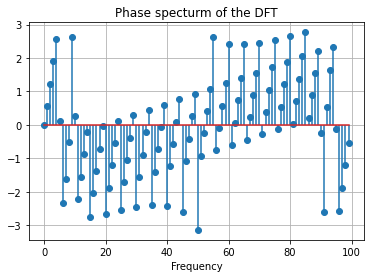

In [44]:
plt.stem(mag)
plt.grid()
plt.title('Magnitude specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

plt.stem(phase)
plt.grid()
plt.title('Phase specturm of the DFT')
plt.xlabel('Frequency')
plt.show()

In [45]:
#DTFT and IDTFT

def DTFT(x):
    x = np.array(x)
    w = np.linspace(0, 2*np.pi, 500)
    x_ejw = []

    for i in range(len(w)):
        x_ejw.append(np.sum(x*np.exp(-1j * w[i]* np.arange(len(x)))))

    magnitude_spec = []

    for i in range(len(w)):
        magnitude_spec.append(np.linalg.norm(x_ejw[i]))
    
    plt.title('Magnitude specturm of the DTFT')
    plt.plot(w, magnitude_spec)
    plt.grid()
    plt.xlabel('Frequency')
    plt.show()
    
    phase_spec = []

    for i in range(len(w)):
        phase_spec.append(cmath.phase(x_ejw[i]))
  
    plt.title('Phase specturm of the DTFT')
    plt.grid()
    plt.plot(w, phase_spec)
    plt.xlabel('Frequency')
    plt.show()
    
    return x_ejw, magnitude_spec, phase_spec

def IDTFT(x, n_samples):
    x = np.array(x)
    w = np.linspace(0, 2*np.pi, 500)
    n= np.linspace(0, n_samples, 1)
    x_n = []

    for i in range(n_samples):
        x_n.append(np.sum(x*np.exp(1j*w*i)))

    x_n = np.array(x_n)
    x_n = np.real((x_n/100))
    
    return x_n

DTFT of the window function w[n] from -pi to pi


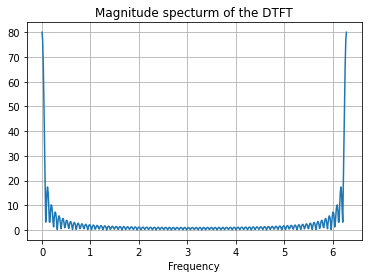

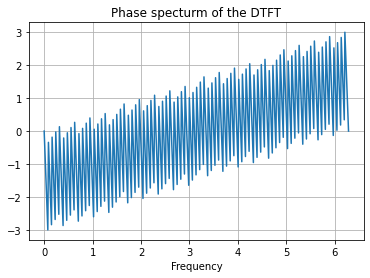

In [46]:
print('DTFT of the window function w[n] from -pi to pi')
cmplx, mag_w, phase_w = DTFT(w_n)

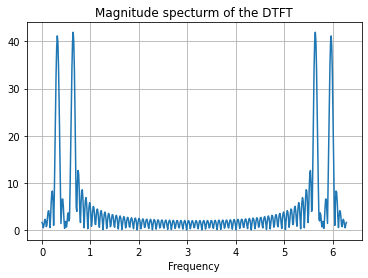

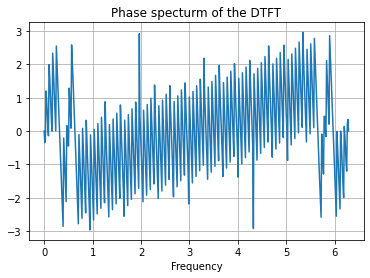

In [47]:
cmplx, mag_v, phase_v = DTFT(v_n)

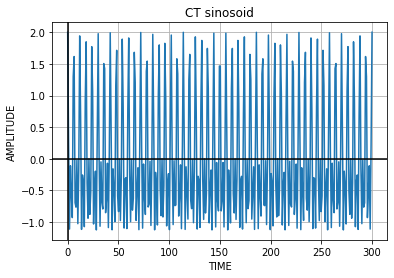

In [48]:
#construct and plot a CT sinosouid

#intializing the time axis
step = 330 #Resolution of time variable/sampling time
t = np.linspace(0,300, step)

#parameters of the sinosoid function
w0 = 2*np.pi/6
w1 = 2*np.pi/3

#amplitude of signals
A1 = A2 = 1

f0 = w0/2*np.pi #frequency of first component
f1 = w1/2*np.pi #frequency of second component

x_t = A1*np.cos(w0*t) + A2*np.cos(w1*t) #ct signal

#plotting the sinosoid wrt time
plt.grid()
plt.plot(t, x_t)
plt.title('CT sinosoid')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel('TIME')
plt.ylabel('AMPLITUDE')
plt.show()

Plot of X(w), for sampling rate Ts = 330


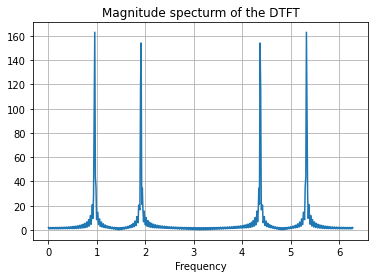

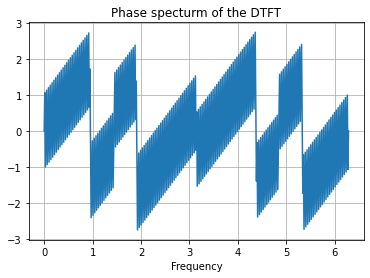

In [49]:
print('Plot of X(w), for sampling rate Ts = 330')

values_continous, mag_cont_sampled, phase_cont_sampled = DTFT(x_t)

Estimate of CTFT of x(t) is: 


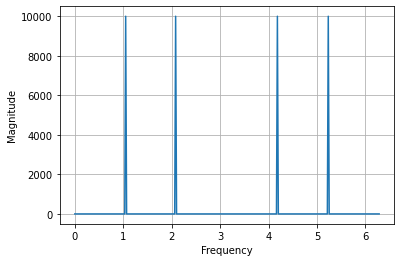

In [50]:
print('Estimate of CTFT of x(t) is: ')

x = np.linspace(0, 2*np.pi, 330)
x[274]
x[219]
x[109]
x[55]
y = np.zeros(330)

#impulses as frequencies at wc set to 10000 values
y[274] = y[219] = y[109] = y[55] = 10000

plt.plot(x, y)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.grid()

Do the amplitudes of V[K] reflect V(w) that of ? Why? 


Do the amplitudes of V(w) reflect that X(w) of ?  Why? 

In [51]:
print('YES, because DFT is just a sampled version of the DTFT, where DFT is discrete and DTFT is a continous function of frequency\n')

print('Yes, because V(w) is the time domain sampled and time limited version of the analog signal X(w)')

YES, because DFT is just a sampled version of the DTFT, where DFT is discrete and DTFT is a continous function of frequency

Yes, because V(w) is the time domain sampled and time limited version of the analog signal X(w)
